Python Programlamaya Giriş yazı dizimizin bu bölümünün konusu, Python'da isimler ve nesnelerin eşleştirilmesinin ayrıntıları, ve bu ayrıntıların bazen nasıl bizi şaşırtabileceği. Dizinin bütün yazılarına erişmek için <a href="http://www.veridefteri.com/category/python-giris/"><em>Python Programlamaya Giriş</em></a> kategorimize bakabilirsiniz. Bu dizideki yazılar ayrıca Jupyter defterleri halinde <a href="https://github.com/sibirbil/VeriDefteri/tree/master/Python_Programlama">GitHub depomuzda</a> da mevcut.

Nesneler ve referanslar
===
Elimizde `a` isimli bir liste olsun. Diyelim bu listeyi kopyalayıp `b` isimli ikinci ve eş bir liste yaratmak istiyoruz. İlk aklımıza gelen şeyi yapalım ve basit bir atama yapalım.

In [1]:
a = [1,2,3]
b = a
b

[1, 2, 3]

Şimdi `a`'yı bir kenara bırakalım ve `b` ile çalışalım. Sözgelişi, `b`'nin ikinci elemanını değiştirelim.

In [2]:
b[1] = "abc"
b

[1, 'abc', 3]

Ancak, bu değişiklik `b` ile sınırlı kalmaz, `a`'yı da etkiler.

In [3]:
a

[1, 'abc', 3]

Birçok başka programlama dilinde görülmeyen bu davranışın nedenini anlamak için Python'un atamaları nasıl yaptığına bakmamız gerekiyor.

Basit bir atamayla başlayalım. Yorumlayıcı `a = 42` gibi bir atama ifadesi gördüğünde iki şey yapar: 42 değerini taşıyan bir tamsayı nesnesi yaratır, ayrıca bir `a` ismi yaratır, ve bu ismi 42 nesnesine bağlar. İsim ve işaret ettiği nesne birbirlerinden bağımsız varlıklardır.

In [4]:
from IPython.display import Image

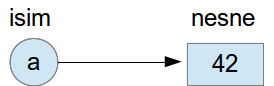

In [5]:
Image("img/atamalar1.png")

İsimlerle nesneler birbirinden ayrıldığı için, Python’da değişkenlerin ne tipte olduğunu (tamsayı, karakter, vs) deklare etmeniz gerekmez. Aynı isim çok farklı tipte nesnelere aktarılabilir. Mesela hemen ardından `a = "merhaba"` komutu verirsek yorumlayıcı `"merhaba"` dizesini barındıran bir nesne yaratır, ve `a` ismini bu yeni dizeye bağlar.

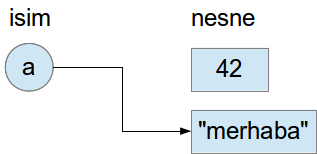

In [6]:
Image("img/atamalar2.png")

Bu olunca 42'ye ne olur? Eğer ona referans veren başka bir isim varsa yerinde kalır, yoksa silinir. Her nesneyle beraber ona kaç referans verildiğinin sayısı tutulur. Bu sayı sıfıra indiğinde "çöp toplayıcı" o nesneyi bellekten kaldırır.

`a` değişkenini `"merhaba"`ya bağladıktan sonra `b = a` gibi bir atama yapıldığında `"merhaba"`ya bir de `b` ismi bağlanır. Şimdi aynı nesnenin iki farklı ismi vardır.

In [7]:
a = "merhaba"
b = a
b is a

True

Burada kullandığımız `is` işleminin `True` vermesi iki ismin aynı nesneye işaret ettiğini gösterir. Yani `a` ve `b`'deki değerler eşit olmakla kalmıyorlar, aynılar.

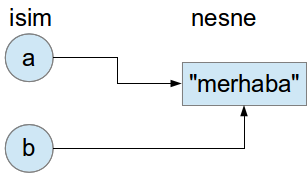

In [8]:
Image("img/atamalar3.png")

Şimdi yukarıdaki davranışı daha iyi anlayabiliyoruz. Yaptığımız atamalar sonucunda `a` ve `b` aynı listeye işaret ettiğinden, `b` ismi aracılığıyla yapılan bir değişiklik `a` ismine de yansır.

In [9]:
a = [1,2,3]
b = a
a is b, a[0] is b[0]

(True, True)

In [10]:
from IPython.display import IFrame

Bunu daha iyi görmek için [Python Tutor](http://pythontutor.com/) sitesinden, Python kodunun işletilme aşamalarını görsel olarak sunan bir programcığı kullanabiliriz (internet bağlantısı gerektirir).

In [11]:
IFrame(src="http://pythontutor.com/iframe-embed.html#code=a%20%3D%20%5B1,2,3%5D%0Ab%20%3D%20a%0Ab%5B0%5D%20%3D%20%22abc%22&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=false&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false",
       width=800, height=500) 

Aynı davranış fonksiyonlarda da görülür. Bir fonksiyon parametre olarak bir liste alır ve listeyi kendi içinde değiştirirse, orijinal liste de değişir.

In [12]:
def f(x,L):
    L[0] = x  # L'nin ilk elemanına x'i ata.

a = [1,2,3]
f("merhaba",a)
a

['merhaba', 2, 3]

Sığ ve derin kopyalama
====
Peki ne yapmalıyız? Doğrudan atama yapmak yerine, listenin `copy()` metodunu kullanmamız gerekir. Bu metod ile elde ettiğimiz kopyayı yeni bir isme atadığımızda, artık iki isim aynı nesneye işaret etmez, ve birinde yapılan değişiklik öbürüne aktarılmaz.

In [13]:
a = [1,2,3]
b = a.copy()
print("a is b?", a is b)
print("a == b?", a == b)

a is b? False
a == b? True


Burada `a` ve `b` aynı değerleri taşıyan ama birbirinden ayrı iki liste oldu. Artık birini değiştirmek öbürünün de değişmesine sebep olmayacak.

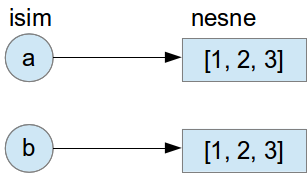

In [14]:
Image("img/atamalar4.png")

In [15]:
b[0] = "abc"
b

['abc', 2, 3]

In [16]:
a

[1, 2, 3]

`copy()` metodu listelerin yanı sıra sözlükler ve kümelerde de mevcuttur. Çokuz ve dizelerde bulunmazlar, ama zaten onlar değiştirilemez (immutable) nesneler oldukları için elemanlarına atama yapılamaz. 

Sıralı nesnelerde (liste, çokuz, dize, vs.) dilimleme işlemi de bir kopya üretmek için kullanılabilir. Böylece bir `a` nesnesini kopyalamak için `a[:]` yazımı kullanılabilir.

In [17]:
a = [1,2,3]
b = a[:]
a is b

False

Ancak, gerek `copy()` metodu gerekse de `a[:]` işlemi _sığ bir kopya_ üretir. Başka bir deyişle, liste elemanlarını birebir kopyalarlar. Ama ya liste elemanının kendisi bir listeyse? O zaman aynı problem daha derin bir seviyede karşımıza çıkar.

In [18]:
a = [5, [4,9,3], 7.1]
b = a.copy()
b[0] = 8                # a'yı değiştirmez
print("a =",a)
print("b =",b)

a = [5, [4, 9, 3], 7.1]
b = [8, [4, 9, 3], 7.1]


In [19]:
b[1][0] = "merhaba"     # a'yı değiştirir
print("a =",a)
print("b =",b)

a = [5, ['merhaba', 9, 3], 7.1]
b = [8, ['merhaba', 9, 3], 7.1]


Aynı sorunla karşılaşmamızın sebebi, `a`'nın ikinci elemanının bir referans barındırmasıdır. `copy()` metoduyla kopyalanan da bu referanstır, listenin kendisi değil.

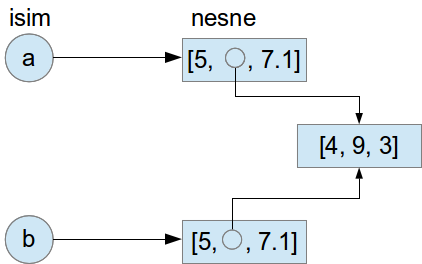

In [20]:
Image("img/atamalar5.png")

Derin seviyelerde kusursuz kopyalama yapabilmek için `copy` modülü içindeki `deepcopy()` fonksiyonunu kullanmak gerekir.

In [21]:
import copy

a = [5, [4,9,3], 7.1]
b = copy.deepcopy(a)

b[1][0] = "merhaba"
print("a =",a)
print("b =",b)

a = [5, [4, 9, 3], 7.1]
b = [5, ['merhaba', 9, 3], 7.1]


Bu sefer derin kopyalama yaptığımız için, `b`'de yaptığımız hiç bir değişiklik artık `a`'ya yansımıyor.

Liste-sayı çarpımı referansları kopyalar
===
Son bir örnek olarak, çarpma işlemiyle çoğaltılmış bir listeler listesini ele alalım.

In [22]:
L = [[1,2,3]]*4
L

[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]

Bildiğimiz gibi bir listeyle bir sayıyı çarpmak, o listenin elemanlarının o sayı kadar tekrarlandığı yeni bir liste yaratır. Burada da beş tane listeden oluşan bir listemiz var. Bu listenin birinci elemanındaki elemanlardan birine bir atama yapalım.

In [23]:
L[0][0] = "abc"
L

[['abc', 2, 3], ['abc', 2, 3], ['abc', 2, 3], ['abc', 2, 3]]

Bu davranışın sebebi liste elemanlarının kendilerinin değil referanslarının kopyalanarak listeye konması. Nitekim `is` işlemi ile kontrol ettiğimizde elemanların aynı nesne olduğunu görüyoruz.

In [24]:
L[0] is L[1]

True

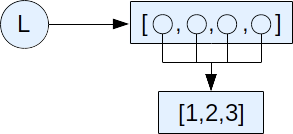

In [25]:
Image("img/atamalar6.png")

Çarpımla çoğaltılan listelerde elemanların değil referansların kopyalanması genel olarak verimlilik sağlayan bir özellik. Aynı nesneleri dört kere değil bir milyon kere çoğalttığımızı düşünün; kopyalamakla gereksiz yere bellek işgal etmiş oluruz. Yine de eğer gerçek kopyalama istiyorsak, `deepcopy()` fonksiyonunu liste kurma işlemi ile beraber şu şekilde kullanabiliriz.

In [26]:
L = [copy.deepcopy(i) for i in [[1,2,3]]*4]
L

[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]

Böylece elemanlar aynı nesne olmaktan çıkar ve birine yapılan atama diğerlerini etkilemez.

In [27]:
L[0] is L[1]

False

In [28]:
L[0][0]="abc"
L

[['abc', 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]